In [1]:
import numpy as np
import pandas as pd
from ISLP import load_data
from ISLP.models import ModelSpec, summarize
import statsmodels.api as sm
from matplotlib.pyplot import subplots
from statsmodels.stats.anova import anova_lm

from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF

In [12]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x + 0.2 * rng.normal(size=100)

Text(0, 0.5, 'y')

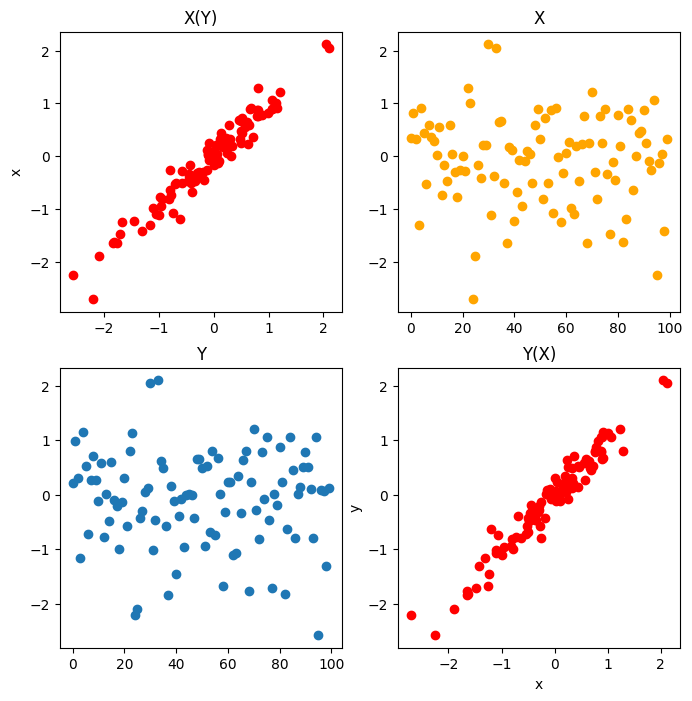

In [13]:
axs = subplots(2, 2, figsize=(8, 8))[1]

ax = axs[0, 0]
# ax.hist(y)
# ax.hist(x)
# ax.legend(["y", "x"])
ax.scatter(y, x, c="r")
ax.set_title("X(Y)")
ax.set_ylabel("x")

ax = axs[0, 1]
ax.scatter(np.arange(len(x)), x, c="orange")
ax.set_title("X")

ax = axs[1, 0]
ax.scatter(np.arange(len(y)), y)
ax.set_title("Y")

ax = axs[1, 1]
ax.scatter(x, y, c="r")
ax.set_title("Y(X)")
ax.set_xlabel("x")
ax.set_ylabel("y")

In [14]:
results = sm.OLS(y, x).fit()
print(f"{results.pvalues=}")
results.index = ["x"]
summarize(results)

results.pvalues=array([1.95889761e-65])


,coef,std err,t,P>|t|
x1,0.9952,0.023,42.551,0.0


In [15]:
# X onto Y

results = sm.OLS(x, y).fit()
print(f"{results.pvalues=}")
summarize(results)

results.pvalues=array([1.95889761e-65])


,coef,std err,t,P>|t|
x1,0.9527,0.022,42.551,0.0


In [16]:
X = ModelSpec([0]).fit_transform(x.reshape(-1, 1))
X
results = sm.OLS(y, X).fit()
print(f"{results.pvalues=}")
results.index = ["x"]
summarize(results)

results.pvalues=array([4.51405182e-01, 1.07625644e-64])


,coef,std err,t,P>|t|
const,-0.0152,0.020,-0.756,0.451
x1,0.9937,0.024,42.236,0.000


a) Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?

- when X ~ Y. Then coefficient ~ 1 for both

In [23]:
# Different coef X->Y and Y->X
x = rng.normal(size=100)
y = 2 * x
result = sm.OLS(y, x).fit()
print(summarize(sm.OLS(x, y).fit())["coef"])
print(summarize(sm.OLS(y, x).fit())["coef"])


x1    0.5
Name: coef, dtype: float64
x1    2.0
Name: coef, dtype: float64


In [24]:
# The same coef X->Y and Y->X
x = rng.normal(size=100)
y = x
result = sm.OLS(y, x).fit()
print(summarize(sm.OLS(x, y).fit())["coef"])
print(summarize(sm.OLS(y, x).fit())["coef"])


x1    1.0
Name: coef, dtype: float64
x1    1.0
Name: coef, dtype: float64
